# Winning Wrestlers Entertainment

In this activity you will be taking four seperate csvs that were scraped down from a wrestling database, merging them together, and then creating charts to visualize a wrestler's wins and losses over the course of four years.

### Part 1 - Macho Merging

* You will likely need to perform three different merges over the course of this activity, changing the names of your columns as you go along.

In [7]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



In [8]:
# Bring each CSV into a separate data frame

wins_2013_path = (r"C:\Users\Steven\gwu-arl-data-pt-09-2020-u-c\02-Homework\05-Matplotlib\02-Matplotlib-Project\01-Stu_WinnerWrestling-Part1\Resources\WWE-Data-2013.csv")
wins_2014_path = (r"C:\Users\Steven\gwu-arl-data-pt-09-2020-u-c\02-Homework\05-Matplotlib\02-Matplotlib-Project\01-Stu_WinnerWrestling-Part1\Resources\WWE-Data-2014.csv")
wins_2015_path = (r"C:\Users\Steven\gwu-arl-data-pt-09-2020-u-c\02-Homework\05-Matplotlib\02-Matplotlib-Project\01-Stu_WinnerWrestling-Part1\Resources\WWE-Data-2015.csv")
wins_2016_path = (r"C:\Users\Steven\gwu-arl-data-pt-09-2020-u-c\02-Homework\05-Matplotlib\02-Matplotlib-Project\01-Stu_WinnerWrestling-Part1\Resources\WWE-Data-2016.csv")

wins_2013_data = pd.read_csv(wins_2013_path)
wins_2014_data = pd.read_csv(wins_2014_path)
wins_2015_data = pd.read_csv(wins_2015_path)
wins_2016_data = pd.read_csv(wins_2016_path)



In [9]:
# Merge the first two datasets (2013 and 2014) on "Wrestler" so that no data is lost (should be 182 rows)
first_wins_merged_df = pd.merge(wins_2013_data, wins_2014_data, how='outer', on='Wrestler')

first_wins_merged_df

,Wrestler,Wins_x,Losses_x,Draws_x,Wins_y,Losses_y,Draws_y
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0
...,...,...,...,...,...,...,...
177,Elias Sampson,NaN,NaN,NaN,3.0,21.0,0.0
178,Chad Gable,NaN,NaN,NaN,5.0,17.0,0.0
179,Steve Cutler,NaN,NaN,NaN,4.0,15.0,0.0
180,Dana Brooke,NaN,NaN,NaN,4.0,10.0,0.0


In [10]:
# Rename our _x columns to "2013 Wins", "2013 Losses", and "2013 Draws"

# Rename our _y columns to "2014 Wins", "2014 Losses", and "2014 Draws"

first_wins_merged_df = first_wins_merged_df.rename(columns = {'Wins_x': '2013 Wins',
                                                 'Losses_x': '2013 Losses',
                                                 'Draws_x': '2013 Draws',
                                                 'Wins_y': '2014 Wins',
                                                 'Losses_y': '2014 Losses',
                                                 'Draws_y': '2014 Draws'})
first_wins_merged_df

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0
...,...,...,...,...,...,...,...
177,Elias Sampson,NaN,NaN,NaN,3.0,21.0,0.0
178,Chad Gable,NaN,NaN,NaN,5.0,17.0,0.0
179,Steve Cutler,NaN,NaN,NaN,4.0,15.0,0.0
180,Dana Brooke,NaN,NaN,NaN,4.0,10.0,0.0


In [11]:
# Merge our newly combined dataframe with the 2015 dataframe
second_wins_merged_df = pd.merge(first_wins_merged_df, wins_2015_data, on = 'Wrestler', how = 'outer')
second_wins_merged_df

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,Wins,Losses,Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...
208,Tommy Dreamer,NaN,NaN,NaN,NaN,NaN,NaN,4.0,9.0,1.0
209,Levis Valenzuela Jr.,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,0.0
210,Cassie,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.0,0.0
211,Gionna Daddio,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,0.0


In [12]:
# Rename "wins", "losses", and "draws" to "2015 Wins", "2015 Losses", and "2015 Draws"
second_wins_merged_df = second_wins_merged_df.rename(columns = {'Wins': '2015 Wins',
                                                 'Losses': '2015 Losses',
                                                 'Draws': '2015 Draws',})
second_wins_merged_df

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...
208,Tommy Dreamer,NaN,NaN,NaN,NaN,NaN,NaN,4.0,9.0,1.0
209,Levis Valenzuela Jr.,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,0.0
210,Cassie,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.0,0.0
211,Gionna Daddio,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,0.0


In [13]:
# Merge our newly combined dataframe with the 2016 dataframe
final_wins_merged_df = pd.merge(second_wins_merged_df, wins_2016_data, on = 'Wrestler', how = 'outer')
final_wins_merged_df


,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,Wins,Losses,Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Nikki Cross,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5.0,0.0
266,Noah Potjes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,10.0,0.0
267,Cezar Bononi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,1.0
268,James Ellsworth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,0.0


In [14]:
# Rename "wins", "losses", and "draws" to "2016 Wins", "2016 Losses", and "2016 Draws"
final_wins_merged_df = final_wins_merged_df.rename(columns = {'Wins': '2016 Wins',
                                                 'Losses': '2016 Losses',
                                                 'Draws': '2016 Draws',})
final_wins_merged_df


,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Nikki Cross,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5.0,0.0
266,Noah Potjes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,10.0,0.0
267,Cezar Bononi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,1.0
268,James Ellsworth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,0.0


In [15]:
# Replace all NaN values with 0 
final_wins_merged_df = final_wins_merged_df.fillna(0)

# Create a new column called "Total Wins" and add up each wrestler's wins per year to fill in the values
final_wins_merged_df["Total Wins"] = final_wins_merged_df["2013 Wins"] + final_wins_merged_df["2014 Wins"] + final_wins_merged_df["2015 Wins"] + final_wins_merged_df["2016 Wins"]

# Create a new column called "Total Losses" and add up each wrestler's losses per year to fill in the values
final_wins_merged_df["Total Losses"] = final_wins_merged_df["2013 Losses"] + final_wins_merged_df["2014 Losses"] + final_wins_merged_df["2015 Losses"] + final_wins_merged_df["2016 Losses"]

# Create a new column called "Total Draws" and add up each wrestler's draws per year to fill in the values
final_wins_merged_df["Total Draws"] = final_wins_merged_df["2013 Draws"] + final_wins_merged_df["2014 Draws"] + final_wins_merged_df["2015 Draws"] + final_wins_merged_df["2016 Draws"]

# Create a new column called "Total Matches" and add up the total wins, losses, and draws for each wrestler to fill in the values
final_wins_merged_df["Total Matches"] = final_wins_merged_df["Total Wins"] + final_wins_merged_df["Total Losses"] + final_wins_merged_df["Total Draws"]

final_wins_merged_df

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,0.0,0.0,0.0,263.0,60.0,8.0,331.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,150.0,1.0,236.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Nikki Cross,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,0.0,8.0,5.0,0.0,13.0
266,Noah Potjes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0,0.0,3.0,10.0,0.0,13.0
267,Cezar Bononi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1.0,1.0,9.0,1.0,11.0
268,James Ellsworth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,0.0,8.0,3.0,0.0,11.0


In [17]:
# Create a new dataframe for those wrestlers who have wrestled at least 100 matches,
# have at least one win in 2013,
# and have at least one win in 2016
wrestled_over_hundred = final_wins_merged_df.loc[(final_wins_merged_df["Total Matches"] >= 100) &
                                                 (final_wins_merged_df["2013 Wins"] > 0) &
                                                 (final_wins_merged_df["2016 Wins"] > 0)]

# Set the index of this new dataframe to be the wrestlers names
wrestled_over_hundred = wrestled_over_hundred.set_index("Wrestler")

wrestled_over_hundred.head()

,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
Wrestler,,,,,,,,,,,,,,,,
Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0
Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0,496.0,199.0,21.0,716.0
Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0,321.0,253.0,7.0,581.0


In [23]:
# Collect the user's input to search through our data frame
wrestler = input('Please input a wrestlers first and last name: ')
wrestler

Please input a wrestlers first and last name: Dean Ambrose


'Dean Ambrose'

In [24]:
final_wins_merged_df.columns

Index(['Wrestler', '2013 Wins', '2013 Losses', '2013 Draws', '2014 Wins',
       '2014 Losses', '2014 Draws', '2015 Wins', '2015 Losses', '2015 Draws',
       '2016 Wins', '2016 Losses', '2016 Draws', 'Total Wins', 'Total Losses',
       'Total Draws', 'Total Matches'],
      dtype='object')

In [60]:
# Create a series that looks for a wrestler by name and then traces their wins from 2013 to 2016
wins_df = final_wins_merged_df.loc[(final_wins_merged_df['Wrestler'] == wrestler), ['2013 Wins', '2014 Wins', '2015 Wins', '2016 Wins']]
wins = wins_df.values.tolist()

# Create a series that looks for a wrestler by name and then traces their losses from 2013 to 2016
losses_df = final_wins_merged_df.loc[(final_wins_merged_df['Wrestler'] == wrestler), ['2013 Losses', '2014 Losses', '2015 Losses', '2016 Losses']]
losses = losses_df.values.tolist()

print(wins)
print(losses)

[[70.0, 129.0, 150.0, 133.0]]
[[134.0, 36.0, 63.0, 67.0]]


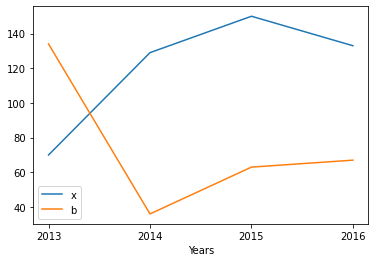

In [61]:
# Create a list of the years that we will use as our x axis
x_axis = ['2013', '2014', '2015', '2016']

# Plot our line that will be used to track a wrestler's wins over the years
wins, = plt.plot(x_axis, wins[0])

# Plot our line that will be used to track a wrestler's losses over the years
losses, = plt.plot(x_axis, losses[0])

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.xlabel("Years")

plt.legend([wins, losses], ['wins', 'losses'], loc="best")

